In [1]:
# Import required libs
import numpy as np
import pandas as pd
import warnings

In [2]:
warnings.filterwarnings('ignore')

In [24]:
## Preaparing the dataset

np.random.seed(0)
data_size = 200
features = np.random.rand(data_size, 2)
labels = (features[:, 0] + features[:,1] > 1).astype(int)

## PD Frame
df = pd.DataFrame(features, columns=['VisitDuration', 'PagesVisited'])
df['Purchase'] = labels

In [35]:
# Train Test Splitting the dataset
from sklearn.model_selection import train_test_split
X_train, X_Test, Y_train, Y_test = train_test_split(df[['VisitDuration','PagesVisited']], df['Purchase'], test_size=0.3, random_state=42)

In [36]:
X_train.shape

(140, 2)

In [37]:
Y_train.shape

(140,)

In [45]:
## Modeling NN Layers
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

model = Sequential([
    Dense(10, activation='relu', input_shape=(2,)),
    Dense(1, activation='sigmoid')
])

In [46]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [54]:
history = model.fit(X_train, Y_train, epochs=10, batch_size=10, validation_split=0.2)

Epoch 1/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - accuracy: 0.7809 - loss: 0.5957 - val_accuracy: 0.8571 - val_loss: 0.5683
Epoch 2/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7404 - loss: 0.5996 - val_accuracy: 0.8571 - val_loss: 0.5636
Epoch 3/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7593 - loss: 0.5825 - val_accuracy: 0.8571 - val_loss: 0.5592
Epoch 4/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7817 - loss: 0.5738 - val_accuracy: 0.8571 - val_loss: 0.5545
Epoch 5/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.8437 - loss: 0.5590 - val_accuracy: 0.8571 - val_loss: 0.5505
Epoch 6/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.8143 - loss: 0.5641 - val_accuracy: 0.8571 - val_loss: 0.5456
Epoch 7/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.8040 - loss: 0.5762 - val_accuracy: 0.8571 - val_loss: 0.5411
Epoch 8/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.8440 - loss: 0.5632 - val_accuracy: 0.8571 - val_loss

In [55]:
loss, accuracy = model.evaluate(X_Test, Y_test)

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.8375 - loss: 0.5438 


In [56]:
print(f"Model Accuracy: {accuracy*100:.2f}%")

Model Accuracy: 85.00%


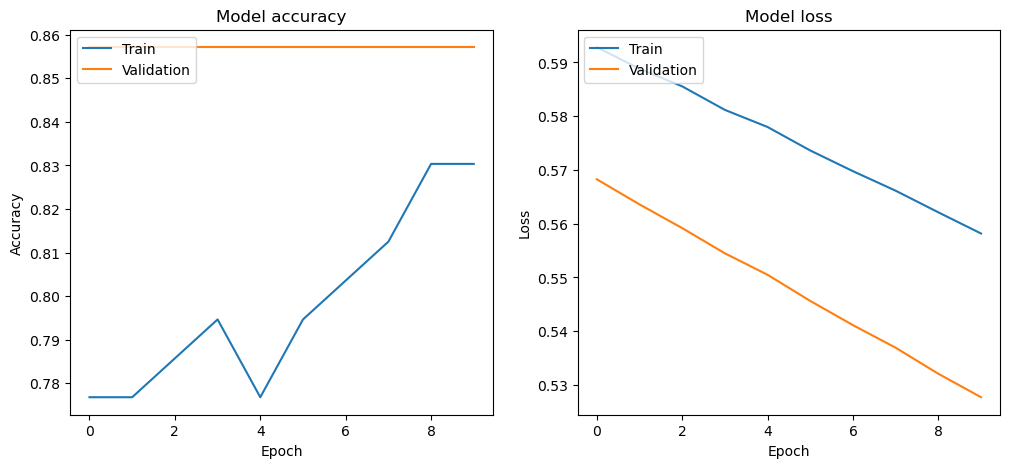

In [57]:

# Plotting training and validation loss and accuracy
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 5))

# Plot training & validation accuracy values
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.show()

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


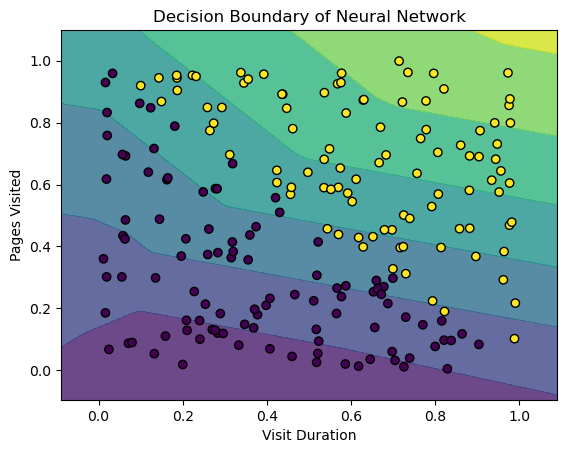

In [59]:
## Decision boundary

# Generate a grid over the feature space
x_min, x_max = df['VisitDuration'].min() - 0.1, df['VisitDuration'].max() + 0.1
y_min, y_max = df['PagesVisited'].min() - 0.1, df['PagesVisited'].max() + 0.1
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100), np.linspace(y_min, y_max, 100))

# Predict over the grid
Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Plot the contour and training examples
plt.contourf(xx, yy, Z, alpha=0.8)
plt.scatter(df['VisitDuration'], df['PagesVisited'], c=df['Purchase'], edgecolor='k')
plt.xlabel('Visit Duration')
plt.ylabel('Pages Visited')
plt.title('Decision Boundary of Neural Network')
plt.show()